In [2]:
import os,sys,inspect

import pnsolver

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import util
import stencil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.io

In [3]:
def load_pn_solution(filename, silent = False):
    data = util.load_pn_system(filename, silent=silent)
    staggered = False
    pni = stencil.PNInfo2D( data["order"], staggered )
    if data["resolution"].shape[0] == 2:
        data["resolution"] = np.array([data["resolution"][0], data["resolution"][1], 1])
    domain = pnsolver.Domain( np.array([7.0, 7.0, 1.0]), data["resolution"], np.array([0.0, 0.0, 0.0]) )
    data["domain"] = domain
    data["pni"] = pni
    
    if "x" in data:
        x_complex = pni.to_complex(data["x"])
    else:
        data["x"] = np.zeros(data["b"].shape)
        x_complex = np.zeros(data["b"].shape, dtype=complex)

    # contruct radiance field from coefficients
    L = pnsolver.SHEXP( data["order"] )
    for index in range(data["numCoeffs"]):
        (l,m) = pni.lm_index(index)
        sh_index = util.sh_index(l,m)
        offset = pni.getOffset(index)*0.5


        u0 = util.extract_coefficient_field( x_complex, data["resolution"], data["numCoeffs"], index )
        L.setCoefficientField( l, m, pnsolver.VoxelGridField( u0, domain, offset ) )
        #print(u0.dtype)
    data["L"] = L
    return data


# Steady-state solver (2d)

Here we show the results of the 2d version of the steady state solver, which solves a global system Ax=b to arrive at a  solution vector x, containing all coefficients up to the given SH-order for every voxel. The left column shows the results for collocated grids, where all coefficients are placed at the cell centers. The right column shows the results for using a staggered grid, where coefficients are placed according to the scheme introduced in starmap (there currently is no strong motivation for using this particular placement). The rows show the results for different truncation order, first order (standard PN), second order (least-squares PN) and dirichlet or neumann boundary conditions.

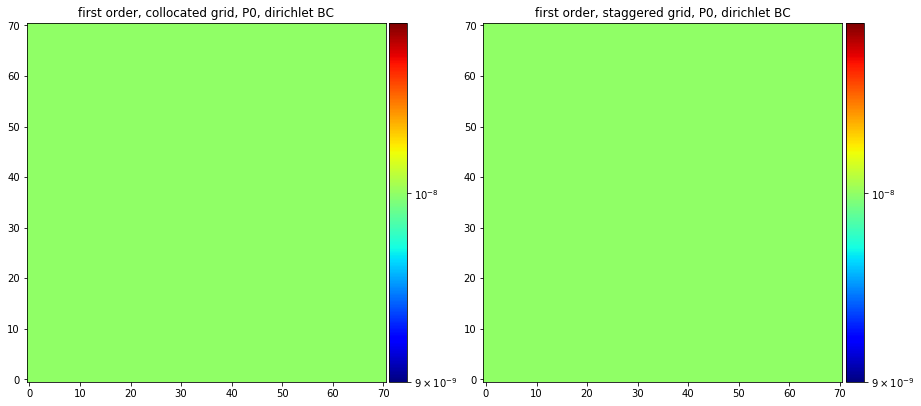

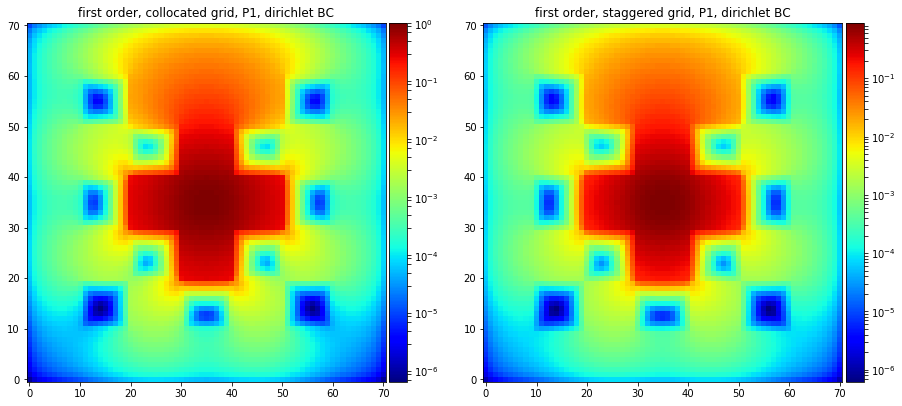

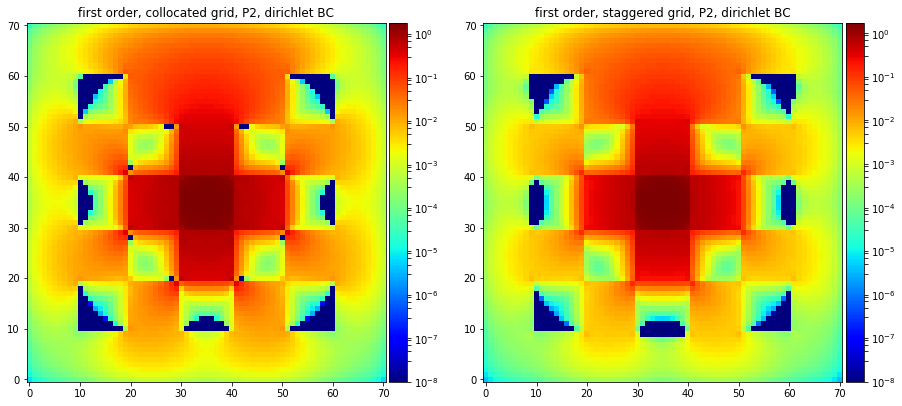

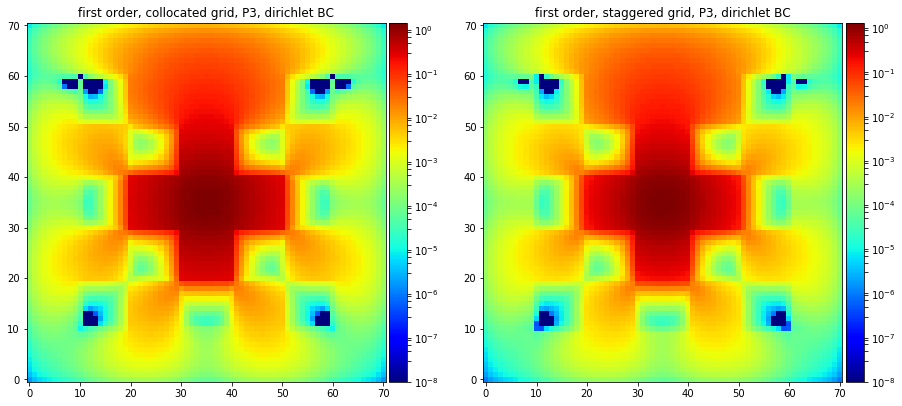

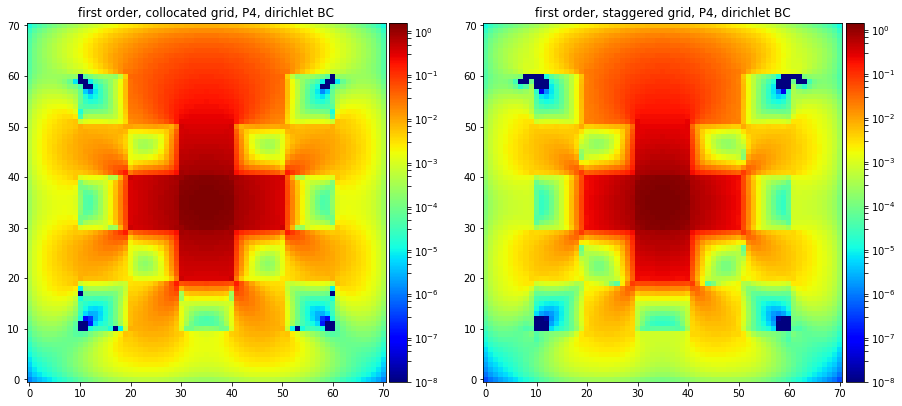

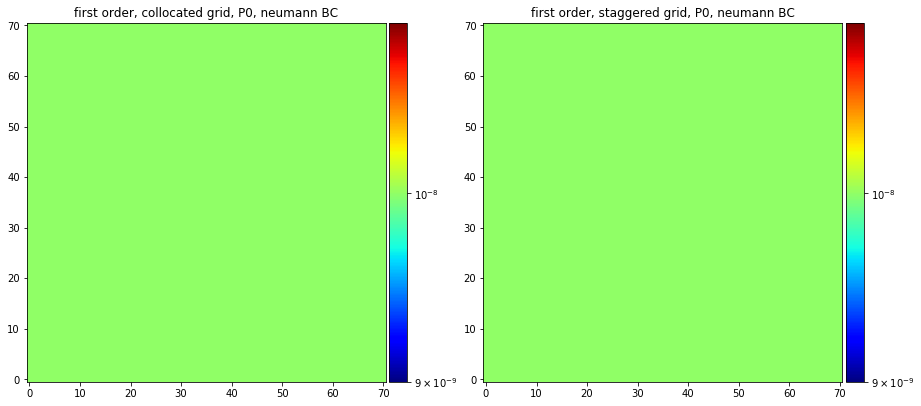

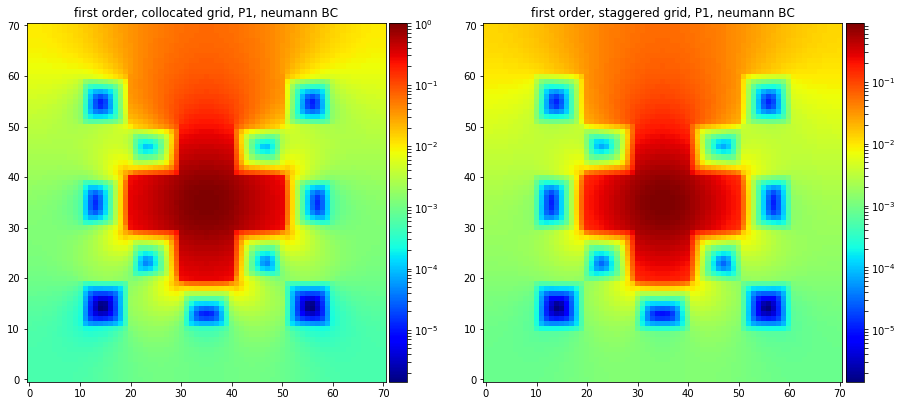

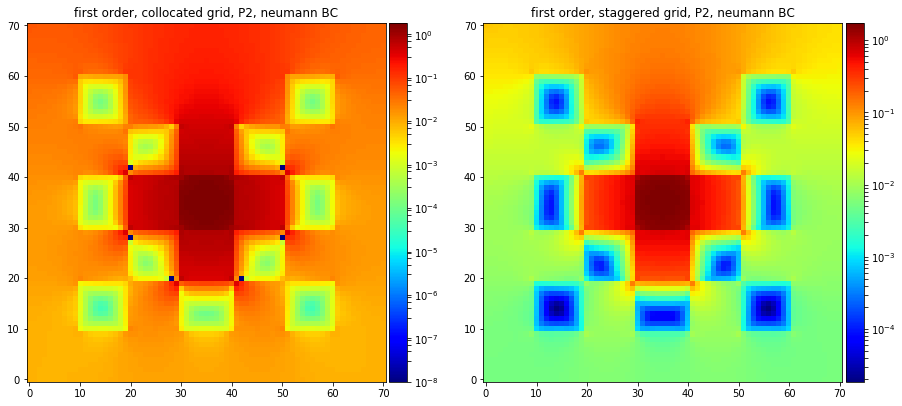

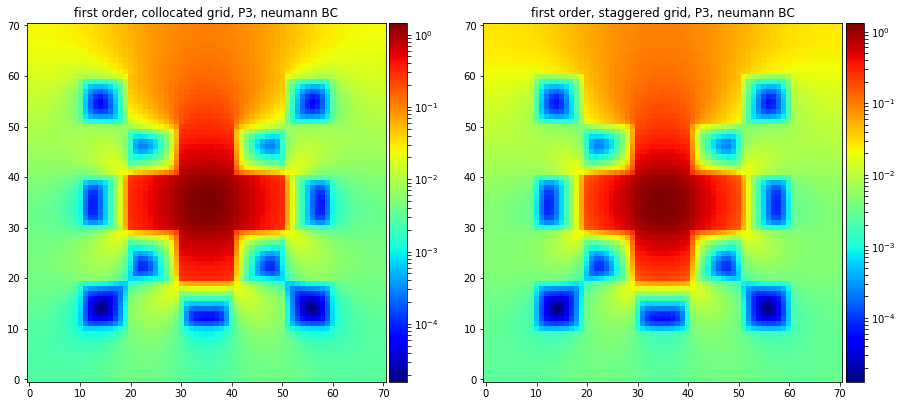

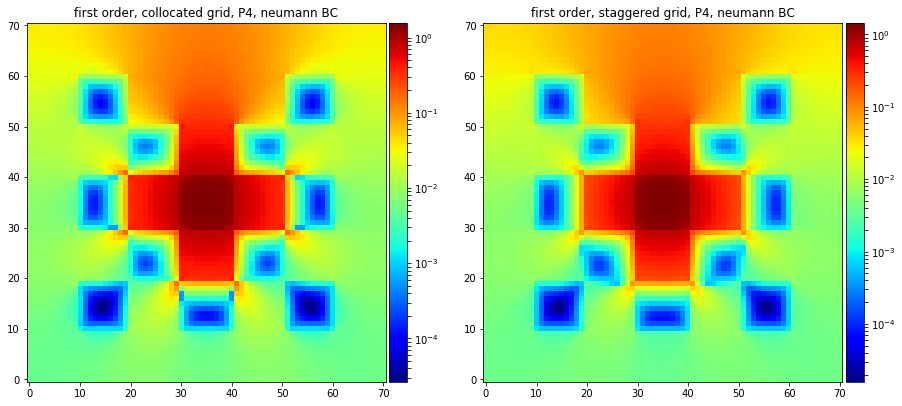

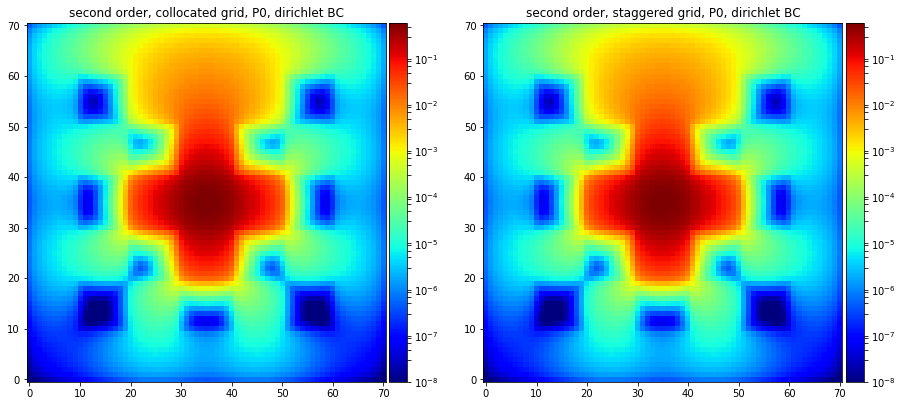

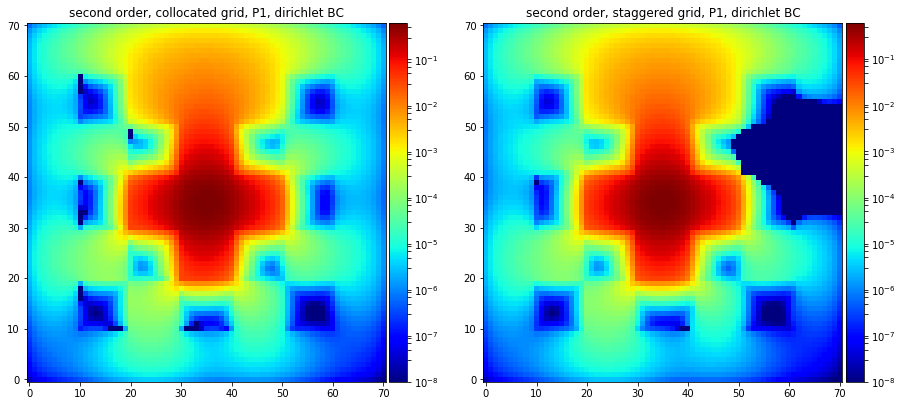

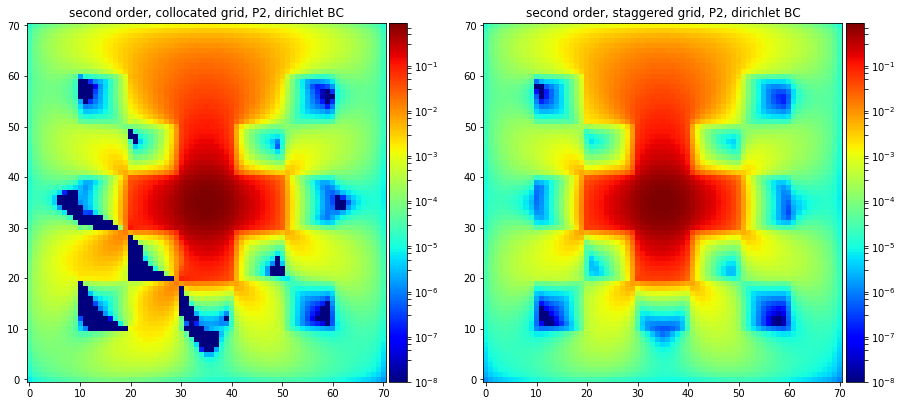

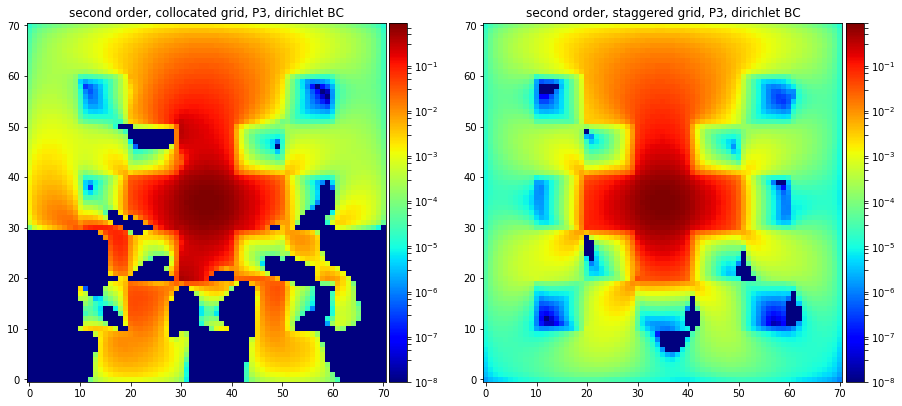

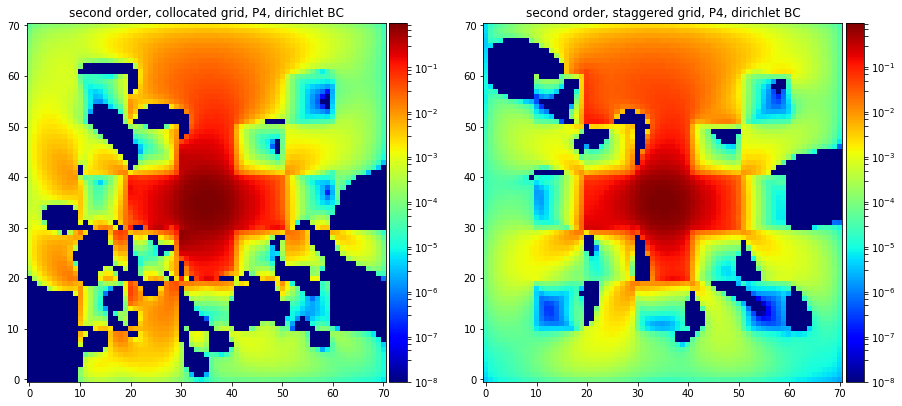

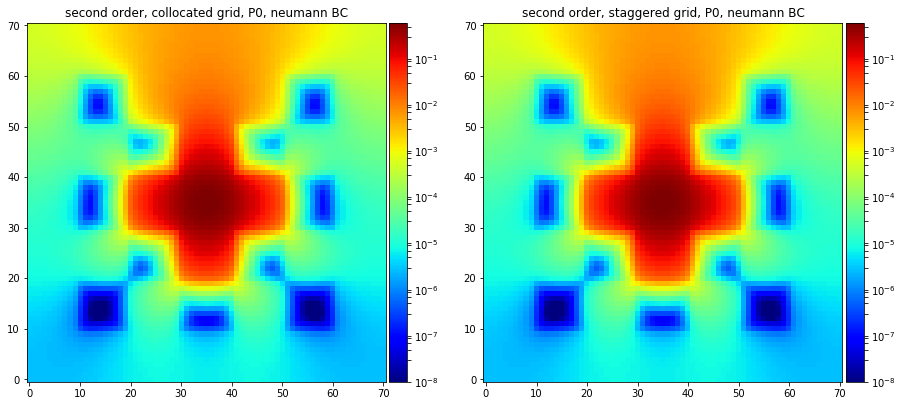

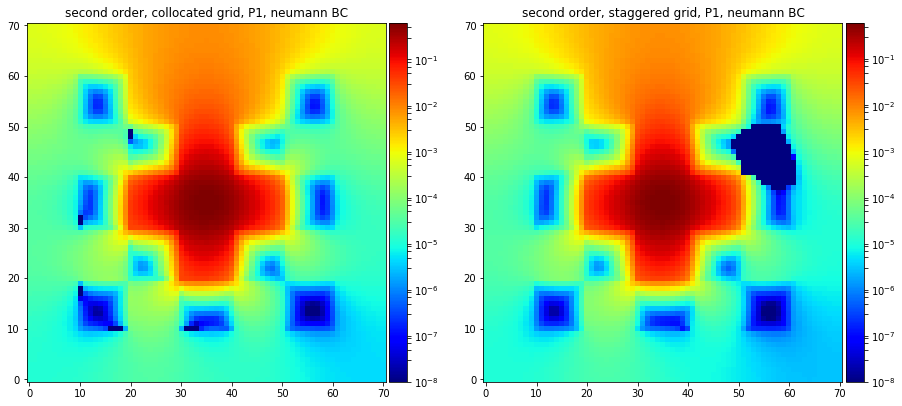

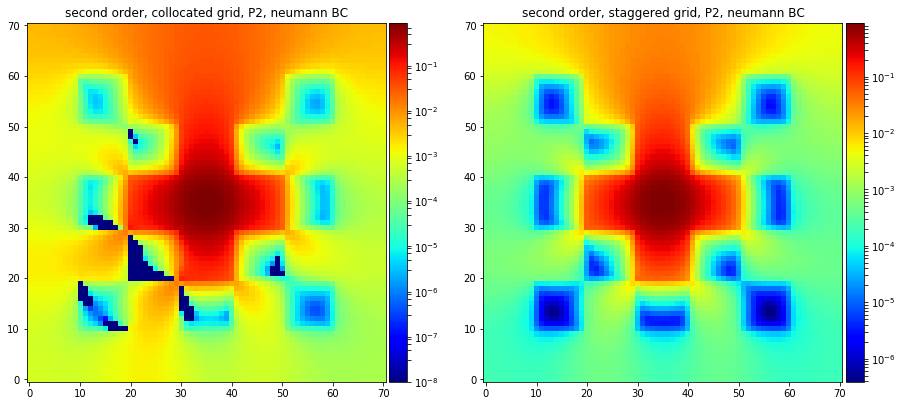

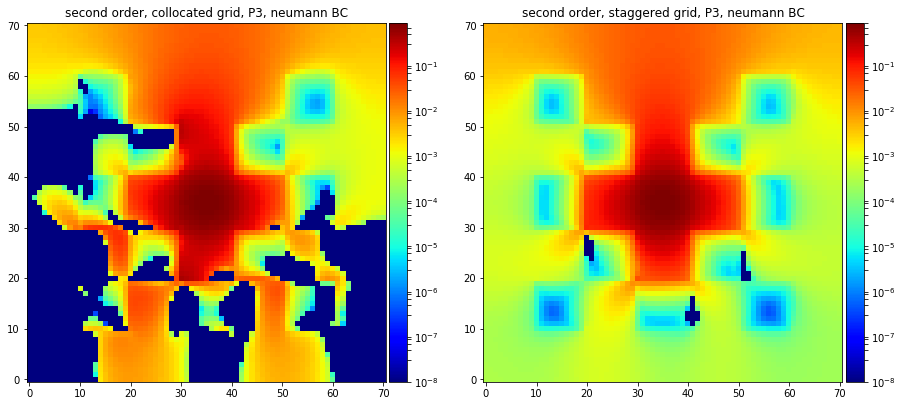

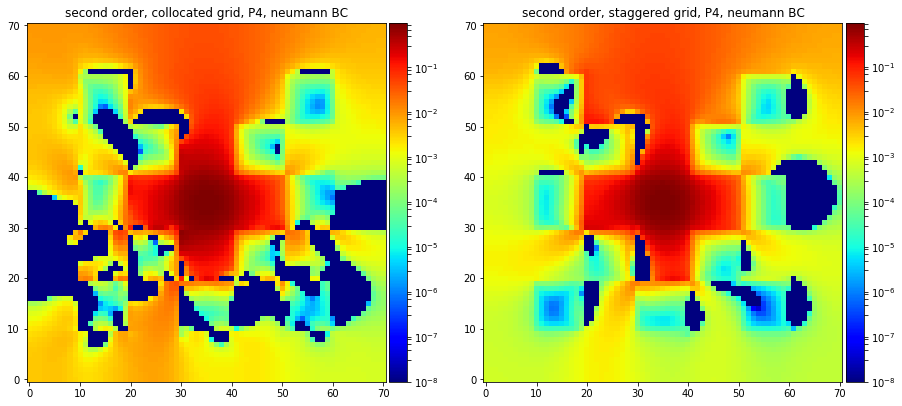

In [6]:
#filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_groundtruth.mat"
#data = util.load_pn_system(filename)
#groundtruth_image = data["x"]
#groundtruth_image = np.clip(groundtruth_image, 1.0e-8, np.max(groundtruth_image))


grid_left = "sg"
wedge_left = 11
wedge_right = 12
maxOrder=5

for i in range(maxOrder):
    fig = plt.figure(figsize=(15,15));
    #order = i+1
    order = i

    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard{}stencil_fopn_p{}_{}.mat".format(wedge_left, order, grid_left)
    data = load_pn_solution(dataset_filename, silent=True)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )

    ax = plt.subplot2grid((1,2), (0,0))
    plt.title("first order, collocated grid, P{}, dirichlet BC".format(order))
    img_view = ax.imshow(u[:, :, 0].T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    
    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard{}stencil_fopn_p{}_sg.mat".format(wedge_right, order)
    data = load_pn_solution(dataset_filename, silent=True)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )

    ax = plt.subplot2grid((1,2), (0,1))
    plt.title("first order, staggered grid, P{}, dirichlet BC".format(order))
    img_view = ax.imshow(u[:, :, 0].T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    plt.show()

for i in range(maxOrder):
    fig = plt.figure(figsize=(15,15));
    #order = i+1
    order = i

    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard{}stencil_fopn_p{}_{}_nbc.mat".format(wedge_left, order, grid_left)
    data = load_pn_solution(dataset_filename, silent=True)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )

    ax = plt.subplot2grid((1,2), (0,0))
    plt.title("first order, collocated grid, P{}, neumann BC".format(order))
    img_view = ax.imshow(u[:, :, 0].T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    
    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard{}stencil_fopn_p{}_sg_nbc.mat".format(wedge_right, order)
    data = load_pn_solution(dataset_filename, silent=True)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )

    ax = plt.subplot2grid((1,2), (0,1))
    plt.title("first order, staggered grid, P{}, neumann BC".format(order))
    img_view = ax.imshow(u[:, :, 0].T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    plt.show()
    
for i in range(maxOrder):
    fig = plt.figure(figsize=(15,15));
    #order = i+1
    order = i

    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard{}stencil_sopn_p{}_{}.mat".format(wedge_left, order, grid_left)
    data = load_pn_solution(dataset_filename, silent=True)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )

    ax = plt.subplot2grid((1,2), (0,0))
    plt.title("second order, collocated grid, P{}, dirichlet BC".format(order))
    img_view = ax.imshow(u[:, :, 0].T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    
    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard{}stencil_sopn_p{}_sg.mat".format(wedge_right, order)
    data = load_pn_solution(dataset_filename, silent=True)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )

    ax = plt.subplot2grid((1,2), (0,1))
    plt.title("second order, staggered grid, P{}, dirichlet BC".format(order))
    img_view = ax.imshow(u[:, :, 0].T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    plt.show()

for i in range(maxOrder):
    fig = plt.figure(figsize=(15,15));
    #order = i+1
    order = i

    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard{}stencil_sopn_p{}_{}_nbc.mat".format(wedge_left, order, grid_left)
    data = load_pn_solution(dataset_filename, silent=True)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )

    ax = plt.subplot2grid((1,2), (0,0))
    plt.title("second order, collocated grid, P{}, neumann BC".format(order))
    img_view = ax.imshow(u[:, :, 0].T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    
    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard{}stencil_sopn_p{}_sg_nbc.mat".format(wedge_right, order)
    data = load_pn_solution(dataset_filename, silent=True)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )

    ax = plt.subplot2grid((1,2), (0,1))
    plt.title("second order, staggered grid, P{}, neumann BC".format(order))
    img_view = ax.imshow(u[:, :, 0].T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    plt.show()


# vs. Starmap results

Here we compare the results from the stead-state solver (left column), against the results from the time-dependent starmap solver run for many timesteps (right column). They seem to be in good agreement up to a very subtle asymmetry in the steady-state results. The P5 solution does not exist for the steady-state solver because the compiler ran out of heap when trying to link the kernel.

In [7]:
def load_starmap_solution( filename ):
    data = scipy.io.loadmat(filename)
    return data["U"]

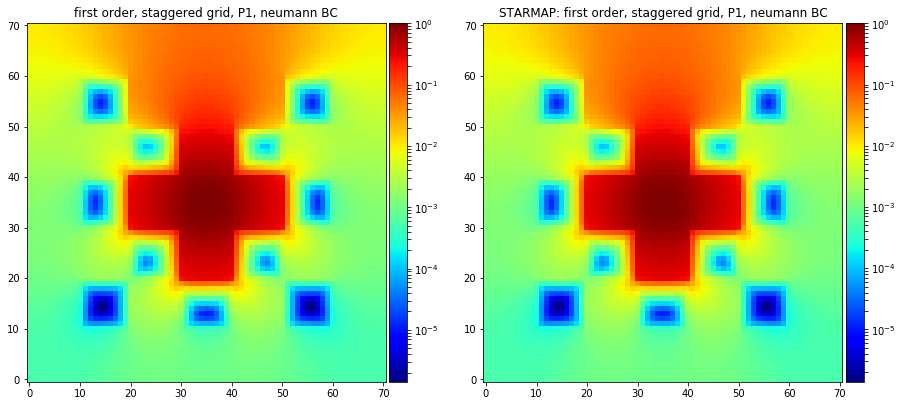

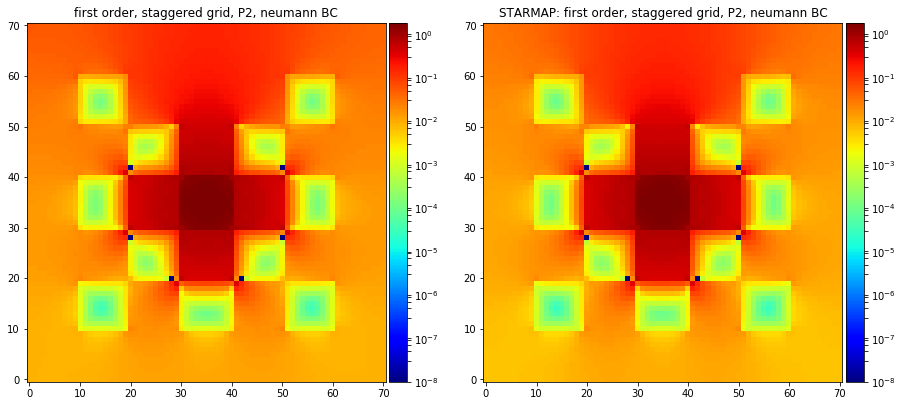

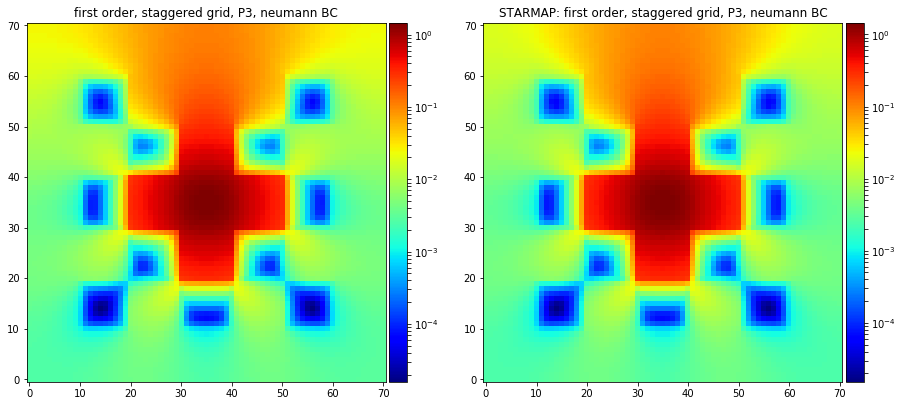

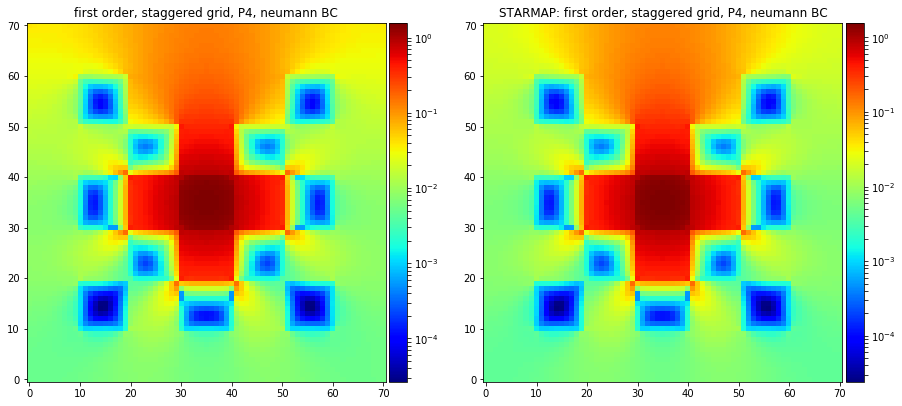

In [10]:
maxOrder = 4
for i in range(1, maxOrder+1):
    fig = plt.figure(figsize=(15,15));
    order = i

    dataset_filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard12stencil_fopn_p{}_sg_nbc.mat".format(order)
    data = load_pn_solution(dataset_filename, silent=True)
    u = util.extract_coefficient_field( data["x"], data["resolution"], data["numCoeffs"], 0 )
    u = np.clip( u, 1.0e-8, np.max(u) )
    #print("pnsolver max={}".format(np.max(u)))

    ax = plt.subplot2grid((1,2), (0,0))
    plt.title("first order, staggered grid, P{}, neumann BC".format(order))
    img_view = ax.imshow(u[:,:,0].T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    #img_view = ax.imshow(u, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=1.56163327141), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    
    filename = "c:/projects/epfl/epfl17/python/pnsolver/results/starmap/checkerboard_p{}_nbc.mat".format(order)
    u = load_starmap_solution(filename)
    u = np.clip( u, 1.0e-8, np.max(u) )
    #print("starmap max={}".format(np.max(u)))

    ax = plt.subplot2grid((1,2), (0,1))
    plt.title("STARMAP: first order, staggered grid, P{}, neumann BC".format(order))
    img_view = ax.imshow(u.T, cmap='jet', norm=LogNorm(vmin=np.min(u), vmax=np.max(u)), origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    plt.show()
